# Принятие решений в бизнесе

Для анализа предоставлены данные интернет-магазина по посетителям и совершённым заказам для групп А и В за один месяц.

Цель исследования: приоритизировать гипотезы, проанализировать результаты A/B-теста и определить наиболее успешную группу, либо зафиксировать отсутствие различий.

**Описание данных:**

Таблица hypothesis:
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Таблица orders:
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.
 
Таблица visitors:
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста.

## План работы

1. [Изучение данных](#1)

2. [Предобработка данных](#2)

3. [Приоритизация гипотез](#3)

4. [Анализ А/В теста](#4)

    4.1 [Кумулятивная выручка по группам](#4.1)

    4.2 [Кумулятивный средний чек по группам](#4.2)

    4.3 [Оносительное изменение кумулятивного среднего чека группы B к группе A](#4.3)

    4.4 [Кумулятивная конверсия по группам](#4.4)

    4.5 [Относительное изменение кумулятивной конверсии группы B к группе A](#4.5)

    4.6 [Количество заказов](#4.6)

    4.7 [Стоимость заказов](#4.7)

    4.8 [Статистическая значимость различий в конверсии между группами по «сырым» данным](#4.8)

    4.9 [Статистическая значимость различий в среднем чеке по «сырым» данным](#4.9)

    4.10 [Cтатистическая значимость различий в конверсии между группами по «очищенным» данным](#4.10)
  
    4.11 [Статистическая значимость различий в среднем чеке по «очищенным» данным](#4.11)

5. [Общие выводы](#5)


<a name="1"><h2>1 Изучение данных</h2></a>

Импортируем библиотеки:

In [1]:
import pandas as pd
from datetime import datetime, timedelta
import datetime as dt
import numpy as np
import seaborn as sns
from scipy import stats as st
import matplotlib.pyplot as plt
import matplotlib
%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = 8, 6
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150

Прочитаем данные и сохраним их в переменные hypothesis, visitors, orders:

In [2]:
hypothesis = pd.read_csv('/content/hypothesis.csv')
orders = pd.read_csv('/content/orders.csv')
visitors = pd.read_csv('/content/visitors.csv')

Посмотрим таблицу с гипотезами:

In [3]:
hypothesis 

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Таблица содержит 7 столбцов и 9 строк с описанием гипотез. 

Выведем первые 10 строк таблицы orders и посмотрим общую информацию:

In [5]:
orders.head(10)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


В таблице 5 столбцов и 1197 записей, пропусков нет.

Посмотрим таблицу visitors:

In [7]:
visitors.head(10)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [8]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


В таблице 3 столбца и 62 записи, пропусков нет.

<div style="border: solid green 2px; padding: 20px">
    
**Выводы**
    
 * Названия столбцов в таблице hypothesis нужно привести к нижнему регистру, так как они записаны с прописной буквы.
 * Для удобства можно заменить индексацию в таблице с гипотезами, чтобы она начиналась с единицы.
 * Столбцы с датами имеют формат object, поэтому их следует перевести в формат даты.</div>

<a name="2"><h2>2 Предобработка данных</h2></a>


Приведём названия столбцов к нижнему регистру в таблице hypothesis:

In [9]:
hypothesis.columns = [x.lower() for x in hypothesis.columns]

Изменим тип данных в столбцах с датами:

In [10]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

Проверим формат в таблицах:

In [11]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


Проверим на наличие явных дубликатов:

In [13]:
visitors.duplicated().sum()

0

In [14]:
orders.duplicated().sum()

0

<div style="border: solid green 2px; padding: 20px">
    
**Выводы**

В результате предобработки данных:

 * привели названия столбцов в соответствие с правильным стилем;
 * проверили таблицу на наличие дубликатов;
 * столбцы с датами привели в соответствующий формат.</div>

<a name="3"><h2>3 Приоритизация гипотез</h2></a>

Заменим индексацию в таблице hypothesis:

In [15]:
hypothesis.index += 1

Для приоритизации гипотез воспользуемся фреймворком ICE:

In [16]:
hypothesis['ICE'] = round(hypothesis['confidence'] * hypothesis['impact'] / hypothesis['efforts'], 2)

Выведем таблицу с гипотезами, отсортированную по убыванию ICE:

In [17]:
hypothesis.sort_values(by='ICE',ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE
9,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
8,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
7,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
3,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
2,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
4,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
5,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


Применим фреймворк RICE для приоритизации гипотез:

In [18]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

Выведем таблицу с гипотезами, отсортированную по убыванию RICE:

In [19]:
hypothesis.sort_values(by='RICE',ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
8,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
3,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
7,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
9,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
4,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
2,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
5,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


<div style="border: solid green 2px; padding: 20px">
    
**Выводы**

* В случае приоритизации методом ICE на первом месте оказалась гипотеза "Запустить акцию, дающую скидку на товар в день рождения". При использовании метода RICE данная гипотеза опустилась на пятое место, а наиболее приоритетной стала гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", которая в методе ICE занимала 3 место.
* Гипотезы, которые занимают последние места в обоих случаях:
 - Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар;
 - Запустить собственную службу доставки, что сократит срок доставки заказов;
 - Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов
 - Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей	</div>

<a name="4"><h2>4 Анализ А/В теста</h2></a>

<a name="4.1"><h3>4.1 Кумулятивная выручка по группам</h3></a>

Подсчитаем количество пользователей в группах А и В:

In [20]:
orders.groupby('group').agg({'visitorId' : 'nunique'})

,visitorId
group,
A,503
B,586


Проверим, есть ли пользователи, которые попали в обе группы:

In [21]:
dubl_visitorId = orders.drop_duplicates(subset=['visitorId', 'group'])
dubl_visitorId = dubl_visitorId.groupby('visitorId', as_index=False)['group'].count().query('group == 2')
dubl_visitorId = dubl_visitorId['visitorId'].reset_index(drop=True)
len(dubl_visitorId)

58

В таблице обнаружено 58 пользователей, которые есть в обоих тестовых группах. Исключим их, обновив таблицу orders:

In [22]:
orders = orders.query('visitorId not in @dubl_visitorId')

Проверим, что дубликаты были удалены:

In [23]:
orders.groupby('group').agg({'visitorId' : 'nunique'})

,visitorId
group,
A,445
B,528


Создадим массив уникальных пар значений дат и групп теста методом drop_duplicates():

In [24]:
datesGroups = orders[['date','group']].drop_duplicates()
datesGroups.head()

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


Получим агрегированные кумулятивные данные о заказах по дням:

In [25]:
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg(
        {'date': 'max', 'group': 'max', 'transactionId': 'nunique', 'visitorId': 'nunique', 'revenue': 'sum',}
    ), axis=1,).sort_values(by=['date', 'group'])
ordersAggregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854


Получим агрегированные кумулятивные данные о посетителях по дням:

In [26]:
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg(
        {'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


Объединим кумулятивные данные в таблице cumulativeData и переименуем столбцы:

In [27]:
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date','group','orders','buyers','revenue','visitors']
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


Создадим таблицы с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе A и B:

In [28]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

Построим график выручки для групп А и B:

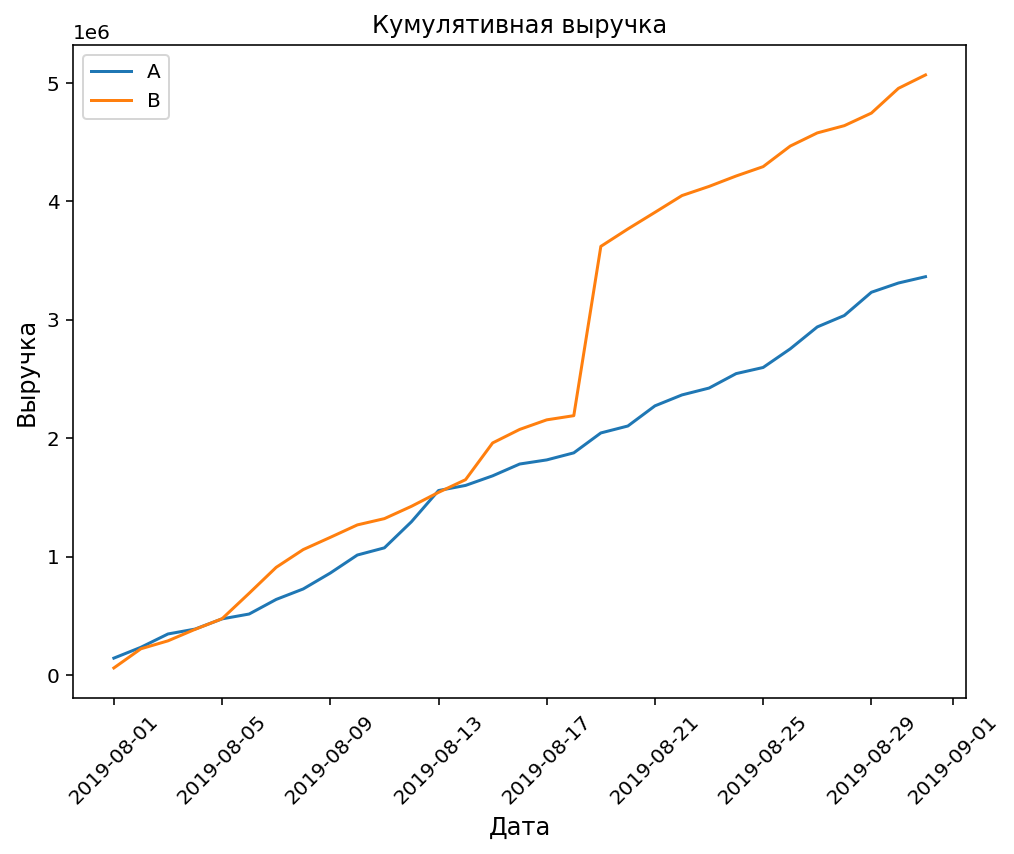

In [29]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('Кумулятивная выручка')
plt.xlabel("Дата", fontsize=12)
plt.ylabel("Выручка", fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.show()

<div style="border: solid green 2px; padding: 20px">
    
**Вывод**
    
Выручка группы B существенно выше группы А. В начале теста разница была небольшая, но после 17 августа выручка группы B резко возрасла и затем росла равномерно.</div>

<a name="4.2"><h3>4.2 Кумулятивный средний чек по группам</h3></a>

Построим график среднего чека по группам, разделив кумулятивную выручку на кумулятивное число заказов:

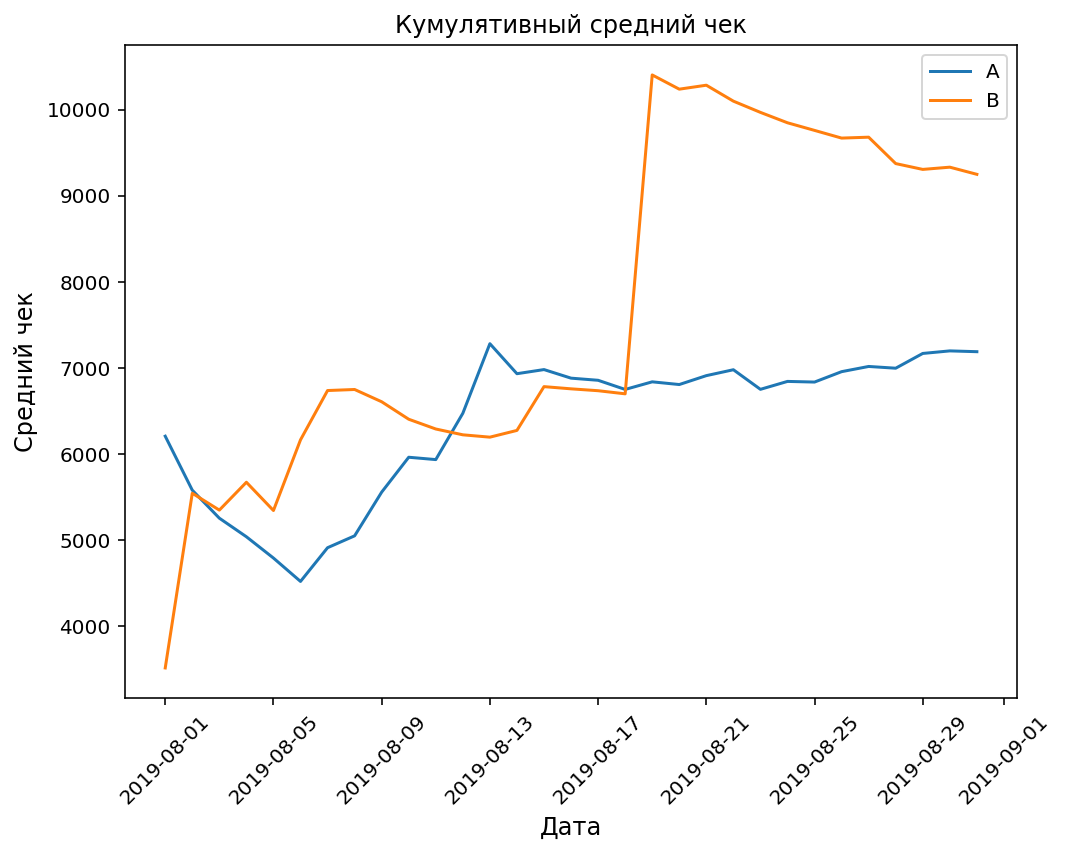

In [30]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.title('Кумулятивный средний чек')
plt.xlabel("Дата", fontsize=12)
plt.ylabel("Средний чек", fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.show()

<div style="border: solid green 2px; padding: 20px">
    
**Вывод**
    
Для группы А средний чек становится равномерным примерно через 10 дней теста, у группы В сумма сначала нестабильна, но затем резко возрастает после 17 августа и далее плавно понижается, но все равно остается заметно выше, чем сумма среднего чека группы А. Такой резкий подъем скорее всего связан с особо крупным заказом.</div>

<a name="4.3"><h3>4.3 Оносительное изменение кумулятивного среднего чека группы B к группе A</h3></a>

Объединим таблицы кумулятивной выручки группы А и группы В:

In [31]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeRevenue.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,142779,23,59758,17
1,2019-08-02,234381,42,221801,40
2,2019-08-03,346854,66,288850,54
3,2019-08-04,388030,77,385740,68
4,2019-08-05,474413,99,475648,89


Строим отношение средних чеков и добавляем ось X:

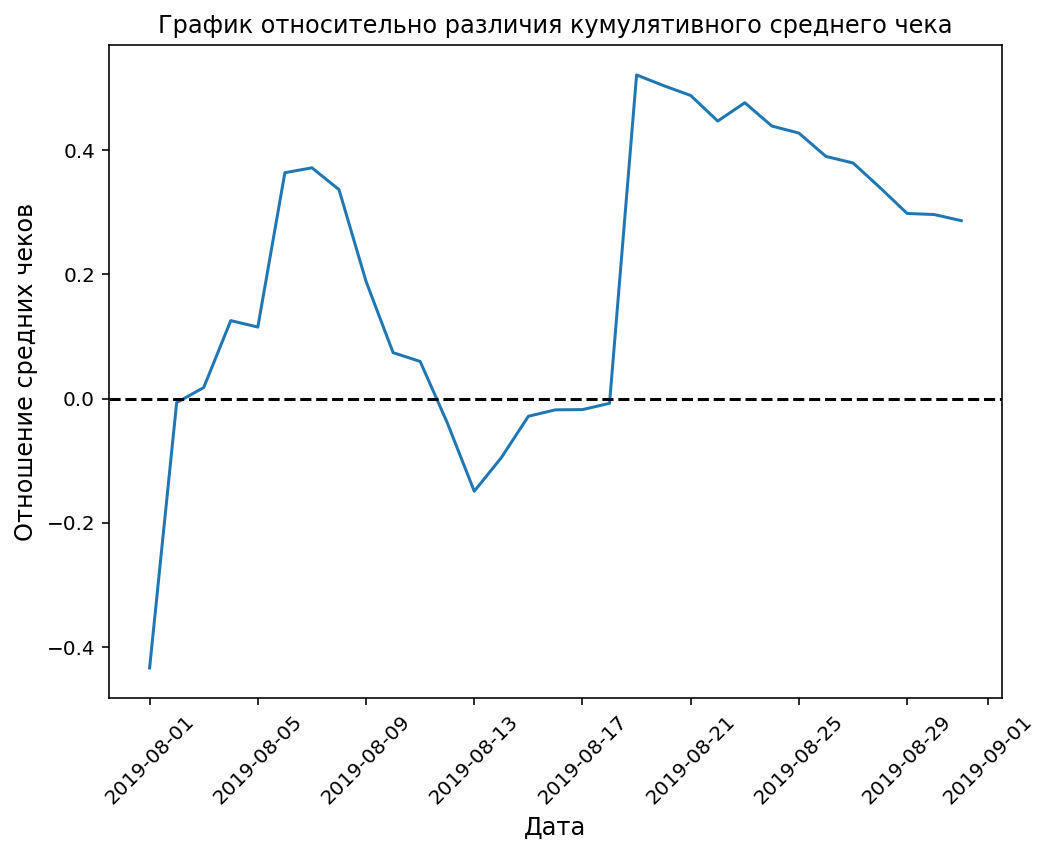

In [32]:
plt.plot(mergedCumulativeRevenue['date'],
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 

plt.title('График относительно различия кумулятивного среднего чека')
plt.xlabel("Дата", fontsize=12)
plt.ylabel("Отношение средних чеков", fontsize=12)
plt.xticks(rotation=45)
plt.show()

<div style="border: solid green 2px; padding: 20px">
    
**Вывод**
    
На графике относительного различия для среднего чека наблюдаются резкие скачки, в начале и в конце средний чек группы B существенно выше группы А, хотя на середине теста он проигрывал группе А примерно на 15%. К концу тестового периода средний чек группы В стал понижаться, но остался выше примерно на 30%.</div>

<a name="4.4"><h3>4.4 Кумулятивная конверсия по группам</h3></a>

Подсчитаем кумулятивную конверсию:

In [33]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

Отделим данные по группе А и группе В:

In [34]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

Построим график с кумулятивной конверсией:

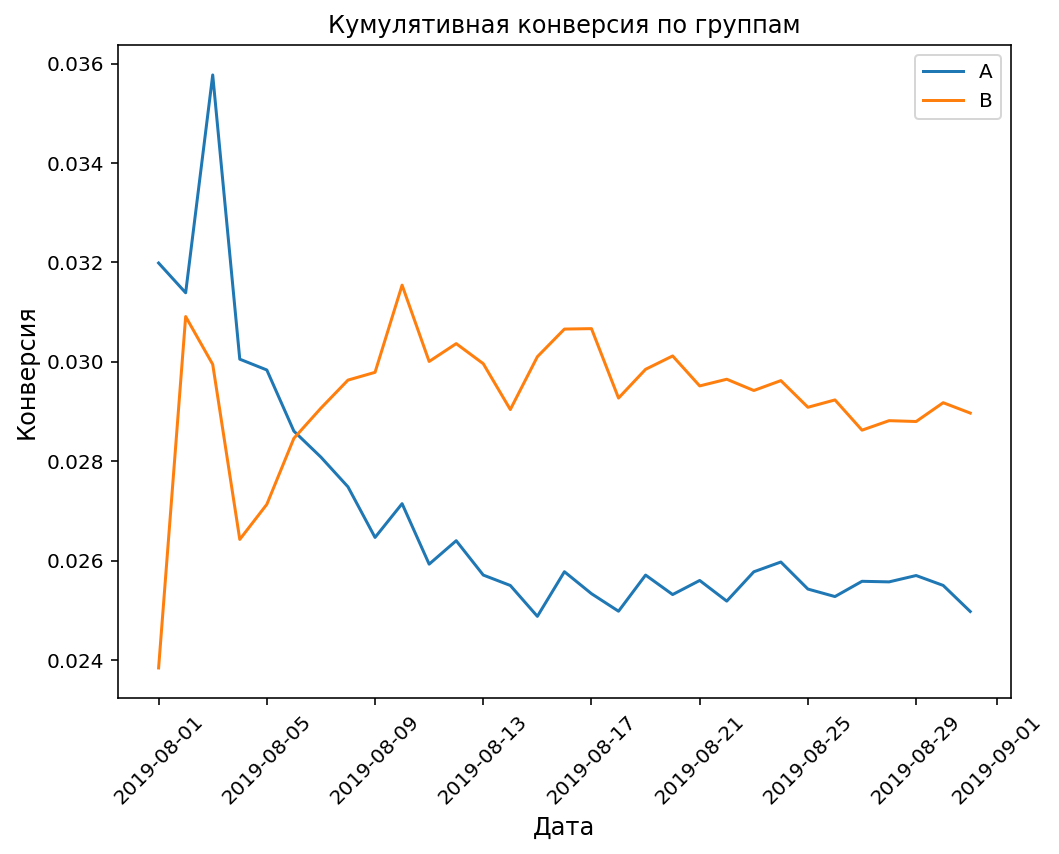

In [35]:
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.title('Кумулятивная конверсия по группам')
plt.xlabel("Дата", fontsize=12)
plt.ylabel("Конверсия", fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.show()

<div style="border: solid green 2px; padding: 20px">
    
**Вывод**
    
Изначально конверсия группы А была значительно выше второй группы, но затем резко понизилась и стала равной прмерно 2,5%. Конверсия группы В сначала сильно колебалась и в итоге стабилизировалась примерно на уровне 3%.</div>

<a name="4.5"><h3>4.5 Относительное изменение кумулятивной конверсии группы B к группе A</h3></a>

Создадим таблицу mergedCumulativeConversions, объединив таблицы с конверсией по группам А и В:

In [36]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeConversions.head(10)

,date,conversionA,conversionB
0,2019-08-01,0.031989,0.023843
1,2019-08-02,0.031390,0.030912
2,2019-08-03,0.035772,0.029950
3,2019-08-04,0.030055,0.026428
4,2019-08-05,0.029837,0.027134
5,2019-08-06,0.028607,0.028463
6,2019-08-07,0.028084,0.029070
7,2019-08-08,0.027486,0.029634
8,2019-08-09,0.026469,0.029790
9,2019-08-10,0.027148,0.031544


Построим график относительного различия кумулятивных конверсий:

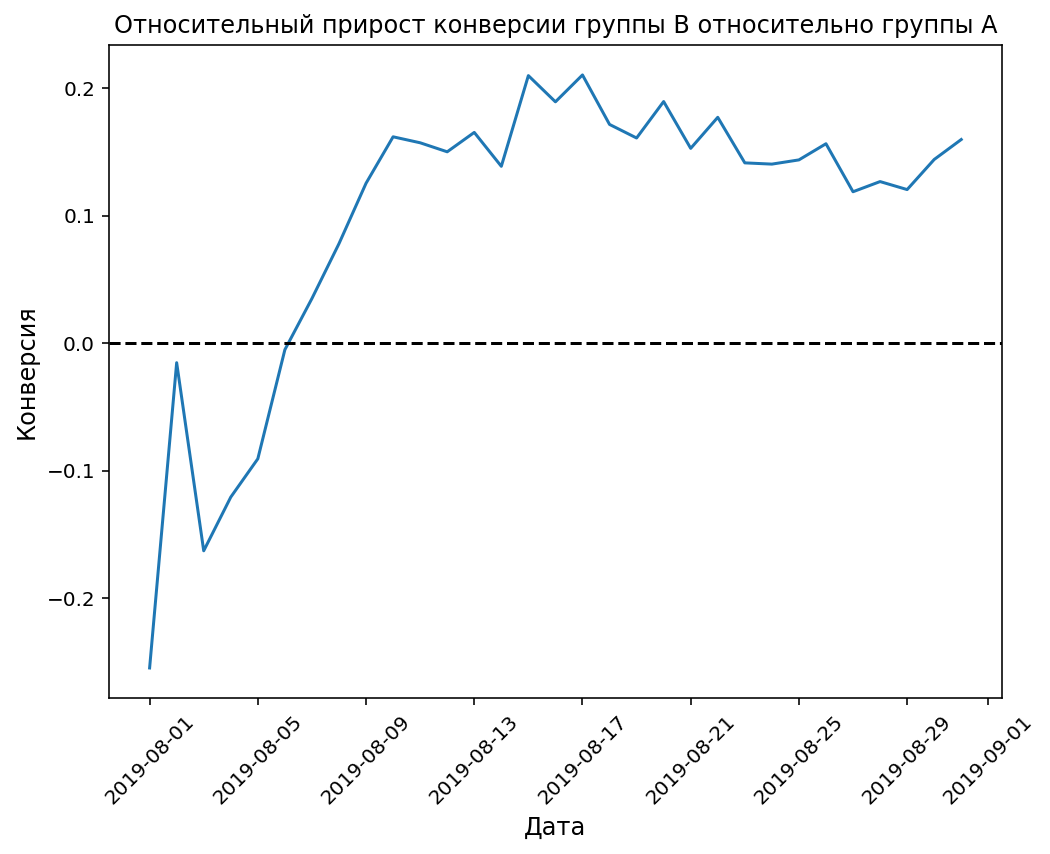

In [37]:
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.axhline(y=0, color='black', linestyle='--')

plt.title('Относительный прирост конверсии группы B относительно группы A')
plt.xlabel("Дата", fontsize=12)
plt.ylabel("Конверсия", fontsize=12)
plt.xticks(rotation=45)
plt.show()

<div style="border: solid green 2px; padding: 20px">
    
**Вывод**
    
Конверсия группы B выше конверсии группы А примерно на 15%.</div>

<a name="4.6"><h3>4.6 Количество заказов</h3></a>

Подсчитаем количество заказов по пользователям и выведем первые 10 строк таблицы, отсортированной по уменьшению количества заказов:

In [38]:
ordersByUsers = orders.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'})
ordersByUsers.columns = ['visitors', 'orders']
ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,visitors,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


Построим точечную диаграмму:

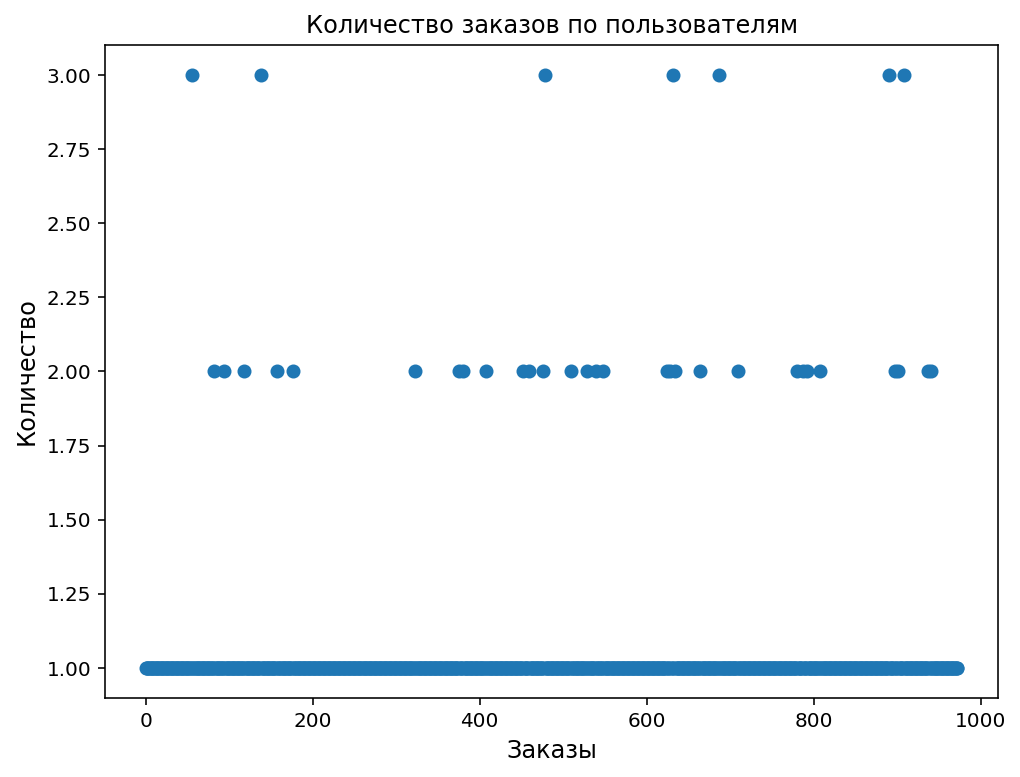

In [39]:
x_values = pd.Series(range(0,len(ordersByUsers))) 
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Количество заказов по пользователям')
plt.xlabel("Заказы", fontsize=12)
plt.ylabel("Количество", fontsize=12)
plt.show()

Большинство пользователей совершают один заказ и совсем редко 3 заказа.

Посчитаем 95-й и 99-й перцентили количества заказов на одного пользователя:

In [40]:
percentile_orders = np.percentile(ordersByUsers['orders'], [95, 99])
percentile_orders

array([1., 2.])

<div style="border: solid green 2px; padding: 20px">
    
**Вывод**
    
Не более 1% клиентов заказывали больше 2 раз. Таких пользователей можно считать аномальными.</div>

<a name="4.7"><h3>4.7 Стоимость заказов</h3></a>

Построим точечную диаграмму стоимостей заказов:

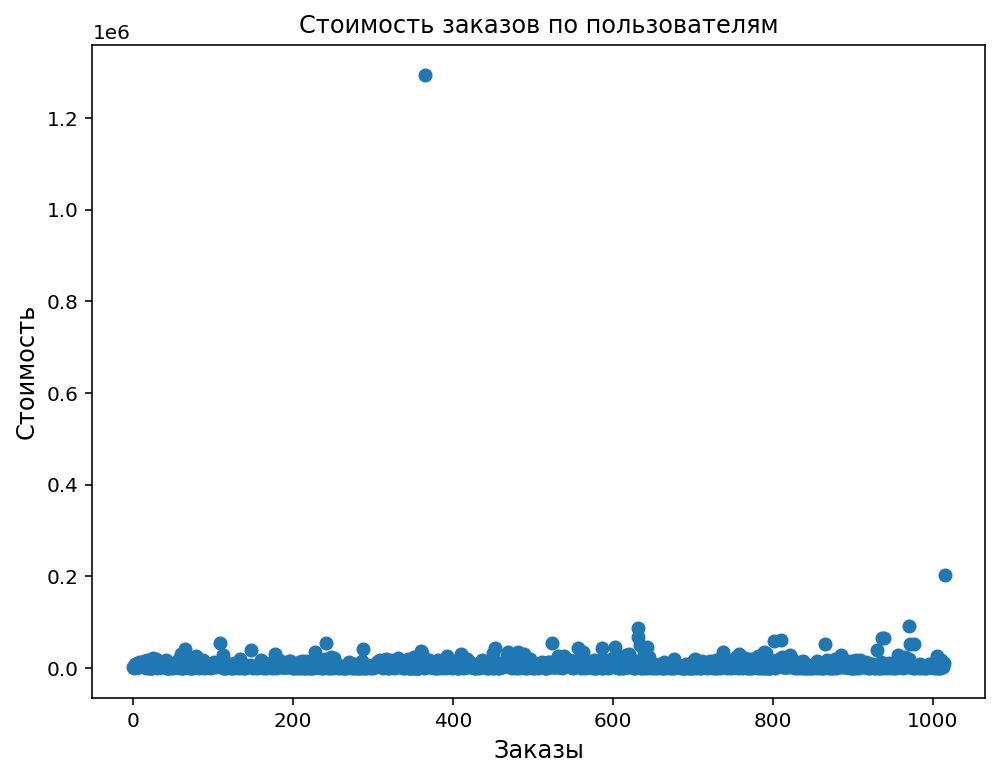

In [41]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Стоимость заказов по пользователям')
plt.xlabel("Заказы", fontsize=12)
plt.ylabel("Стоимость", fontsize=12)
plt.show()

Всего один аномально дорогой заказ стоимостью больше 1,2 млн рублей и один заказ на сумму около 200 тысяч, такие заказы можно считать выбросами. Остальные заказы не превышают ста тысяч.

Посчитаем 95-й и 99-й перцентили стоимости заказов:

In [42]:
percentile_revenue = np.percentile(orders['revenue'], [95, 99])
percentile_revenue

array([26785., 53904.])

<div style="border: solid green 2px; padding: 20px">
    
**Вывод**
    
Не более 5% заказов дороже 26 785 рублей и не более 1% дороже 53 904 рублей, такие заказы будем считать аномальными.</div>

<a name="4.8"><h3>4.8 Статистическая значимость различий в конверсии между группами по «сырым» данным</h3></a>

Сформулируем нулевую и альтернативную гипотезу:

 * H₀: статистически значимых различий в средней конверсии между группами нет.
 * H₁: есть статистически значимые различия в средней конверсии между группами.

Подготовим данные для проверки гипотез и расчета статистической значимости различий конверсий.

Выделим таблицу с количеством посетителей по дням для группы А:

In [43]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
visitorsADaily.head()

,date,visitorsPerDateA
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507
3,2019-08-04,717
4,2019-08-05,756


Создадим таблицу с кумулятивными данными:

In [44]:
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}),axis=1,)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']
visitorsACummulative.head()

,date,visitorsCummulativeA
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318


Выделим таблицу с количеством посетителей по дням для группы B:

In [45]:
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']
visitorsBDaily.head()

,date,visitorsPerDateB
31,2019-08-01,713
32,2019-08-02,581
33,2019-08-03,509
34,2019-08-04,770
35,2019-08-05,707


Создадим таблицу с кумулятивными данными по группе B:

In [46]:
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}),axis=1,)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']
visitorsBCummulative.head()

,date,visitorsCummulativeB
31,2019-08-01,713
32,2019-08-02,1294
33,2019-08-03,1803
34,2019-08-04,2573
35,2019-08-05,3280


Создадим таблицу с количеством заказов и общей выручкой по дням для группы А:

In [47]:
ordersADaily = (orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'}))
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']
ordersADaily.head()

,date,ordersPerDateA,revenuePerDateA
0,2019-08-01,23,142779
1,2019-08-02,19,91602
2,2019-08-03,24,112473
3,2019-08-04,11,41176
4,2019-08-05,22,86383


Добавим таблицу с кумулятивными данными по заказам и выручке для группы А:

In [48]:
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA',]
ordersACummulative.head()

,date,ordersCummulativeA,revenueCummulativeA
0,2019-08-01,23,142779
1,2019-08-02,42,234381
2,2019-08-03,66,346854
3,2019-08-04,77,388030
4,2019-08-05,99,474413


Создадим таблицу с количеством заказов и общей выручкой по дням для группы B:

In [49]:
ordersBDaily = (orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'}))
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']
ordersBDaily.head()

,date,ordersPerDateB,revenuePerDateB
0,2019-08-01,17,59758
1,2019-08-02,23,162043
2,2019-08-03,14,67049
3,2019-08-04,14,96890
4,2019-08-05,21,89908


Добавим таблицу с кумулятивными данными по заказам и выручке для группы В:

In [50]:
ordersBCummulative = ordersBDaily.apply(lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}),axis=1,).sort_values(by=['date'])
ordersBCummulative.columns = ['date','ordersCummulativeB','revenueCummulativeB',]
ordersBCummulative.head()

,date,ordersCummulativeB,revenueCummulativeB
0,2019-08-01,17,59758
1,2019-08-02,40,221801
2,2019-08-03,54,288850
3,2019-08-04,68,385740
4,2019-08-05,89,475648


Объединим таблицы по датам и выведем первые строки на экран:

In [51]:
data = (ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left'))
 
data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Напишем функцию для подсчета количества заказов пользователей по группам:

In [52]:
def orders_users(group):
    table = (orders[orders['group'] == group].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique}))
    table.columns = ['visitorId', 'orders']
    return table    

Создадим переменные ordersByUsersA и ordersByUsersB:

In [53]:
ordersByUsersA = orders_users('A')
ordersByUsersB = orders_users('B')
display(ordersByUsersA.head())
display(ordersByUsersB.head())

,visitorId,orders
0,11685486,1
1,54447517,1
2,66685450,1
3,78758296,1
4,85103373,1


,visitorId,orders
0,5114589,1
1,6958315,1
2,39475350,1
3,47206413,1
4,48147722,1


Напишем функцию для подсчета количества заказов по всем посетителям:

In [54]:
def orders_visitors(table_orders, visitors_group):
    table = pd.concat([table_orders['orders'],pd.Series(
        0, index=np.arange(data[visitors_group].sum() - len(table_orders['orders'])), name='orders')],axis=0)
    return table

Создадим переменные sampleA и sampleB и обратимся к функции orders_visitors:

In [55]:
sampleA = orders_visitors(ordersByUsersA, 'visitorsPerDateA')
sampleB = orders_visitors(ordersByUsersB, 'visitorsPerDateB')
display(sampleA.head())
display(sampleB.head())

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

Выведем относительный прирост конверсии группы B и применим критерий Манна-Уитни для расчета значения p-value:

In [56]:
print("Относительный прирост конверсии группы B:", "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))
print("p-value:", "{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

Относительный прирост конверсии группы B: 0.160
p-value: 0.011


<div style="border: solid green 2px; padding: 20px">
    
**Выводы**
    
 * Относительный выигрыш группы B составил 16%.
 * Так как p-value меньше 0.05, то отвергаем нулевую гипотезу о том, что нет статистически значимых различий в конверсии между группами. </div>

<a name="4.9"><h3>4.9 Статистическая значимость различий в среднем чеке по «сырым» данным</h3></a>

Сформулируем гипотезы:

 * H₀: различий в среднем чеке между группами нет.
 * H₁: различия в среднем чеке между группами есть.

Посчитаем статистическую значимость различий в среднем чеке заказа между группами и p-value:

In [57]:
print("Статистическая значимость различий в среднем чеке:", '{0:.3f}'.format(
    orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))
print("p-value:", '{0:.3f}'.format(
    st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))

Статистическая значимость различий в среднем чеке: 0.287
p-value: 0.829


<div style="border: solid green 2px; padding: 20px">
    
**Выводы**
 * Cредний чек группы B выше на 28,7%.    
 * P-value существенно больше 0.05, поэтому не отвергаем нулевую гипотезу об отсутствии различий средних чеков.</div>

<a name="4.10"><h3>4.10 Cтатистическая значимость различий в конверсии между группами по «очищенным» данным</h3></a>

Уберём из анализа выбивающиеся значения. По количеству заказов будем считать аномальными тех, кто совершил больше 1 заказа, так как 99-й перцентиль равен 2. По стоимости заказов возьмём за верхнюю границу 95-й перцентиль, который равен 26 785 рублей.

In [58]:
usersWithManyOrders = pd.concat(
    [ordersByUsersA[ordersByUsersA['orders'] > percentile_orders[0]]['visitorId'],
     ordersByUsersB[ordersByUsersB['orders'] > percentile_orders[0]]['visitorId'],],
     axis=0,)
usersWithExpensiveOrders = orders[orders['revenue'] > percentile_revenue[0]]['visitorId']

Объединим пользователей в таблице abnormalUsers и подсчитаем число аномальных пользователей:

In [59]:
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head())
print("Количество аномальных пользователей: ", abnormalUsers.shape)

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
Name: visitorId, dtype: int64
Количество аномальных пользователей:  (86,)


Сделаем срезы таблиц с количеством заказов по группам А и В, исключив аномальных пользователей:

In [60]:
ordersByNormalUsersA = ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]
ordersByNormalUsersB = ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]

Обратимся к функции orders_visitors:

In [61]:
sampleAFiltered = orders_visitors(ordersByNormalUsersA, 'visitorsPerDateA')
sampleBFiltered = orders_visitors(ordersByNormalUsersB, 'visitorsPerDateB')

Выведем относительный прирост конверсии группы B и применим критерий Манна-Уитни для расчета значения p-value:

In [62]:
print("Относительный прирост конверсии группы B:", '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))
print("p-value:", '{0:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

Относительный прирост конверсии группы B: 0.173
p-value: 0.016


<div style="border: solid green 2px; padding: 20px">
    
**Выводы**
 
 * Относительный выигрыш группы B увеличился на 1,3% и составил 17,3%.
 * Значение p-value стало выше незначительно, всего на 0.005. Общий вывод не изменился, так же как и в случае с "сырыми" данными отвергем нулевую гипотезу.</div>

<a name="4.11"><h3>4.11 Статистическая значимость различий в среднем чеке  по «очищенным» данным</h3></a>

Рассчитаем статистическую значимость различий в среднем чеке между сегментами и значение p-value:

In [63]:
print("Статистическая значимость различий в среднем чеке:", "{0:.3f}".format(orders[np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),)
        ]['revenue'].mean()/ orders[np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )]['revenue'].mean() - 1))

print("p-value:", '{0:.3f}'.format(st.mannwhitneyu(
            orders[np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )]['revenue'],)[1]))

Статистическая значимость различий в среднем чеке: -0.034
p-value: 0.727


<div style="border: solid green 2px; padding: 20px">
    
**Выводы**
 
 * Cредний чек группы B стал значительно ниже и теперь хуже группы А на 3%.
 * P-value стал меньше на 10%, но вывод не изменился, нулевую гипотезу об отсутствии различий средних чеков между группами не отвергаем.</div>

<a name="5"><h2>5 Общие выводы</h2></a>

В результате работы проанализировали А/B тест и изучили данные по выручке, конверсии и среднему чеку между группами.

По качеству данных стоит отметить, что при проверке групп было найдено 58 пользователей, участвовавших в обеих группах и которые впоследствии были удалены, а также неравномерность выборок - в группе B участников на 15,72% больше.

По кумулятивной выручке график показал, что группа В существенно лучше группы А, выручка выше более чем на 1,5 миллиона. Но также стоит учитывать резкий скачок вверх для чека группы В, который произошёл вероятнее всего из-за аномально дорогого заказа.
    
По конверсии:
 * Есть статистически значимое различие между группами по "сырым" и "очищенным" данным, нулевую гипотезу об отсутствии различий между группами отклонили.
 * График различия между группами показал относительный прирост конверсии группы В относительно группы А, к концу тестового периода конверсия группы B оказалась больше на 15%.
 * Относительный прирост конверсии группы B по "сырым" данным равен 16%, а по данным без аномальных значений прирост составил 17,3%.
    
По среднему чеку:    
 * Нет статистически значимого различия между группами по "сырым" и "очищенным" данным, нулевую гипотезу о равенстве средних чеков не отклонили.
 * График различия среднего чека говорит о нестабильности суммы чека для группы В, возможны резкие скачки и падения ниже группы А, хотя к концу теста средний чек группы В по "сырым" данным стал больше почти на 30%.
 * При расчете статистической значимости различий по "очищенным" данным, результаты группы В стали ниже, чем у группы А на 3%

    
В случае, если основной целью проводимого A/B теста было увеличение конверсии, то фиксируем победу группы В и останавливаем тест. Если предполагалось повысить средний чек, то следует продолжить тест и обратить внимание на этот показатель, возможно он начнёт расти.
    
Также в работе были приоритизированы гипотезы. Применяя фреймворк ICE, наиболее приоритетными стали гипотезы:
 1. Запустить акцию, дающую скидку на товар в день рождения; 
 2. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей; 
 3. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок; 
 4. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию;
 5. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа.

В случае с RICE в топ-5 по приоритету вошли те же гипотезы, но изменилась очередность: 
  1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", на втором;
  2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа", а на пятом;
  3. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
  4. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию; 
  5. Запустить акцию, дающую скидку на товар в день рождения.